In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#nltk importing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

import re
import string

#sklearn importing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Data loading

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Spam_SMS.csv')
df.head()

,Class,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.isnull().sum()

,0
Class,0
Message,0


Checking Balance of Data

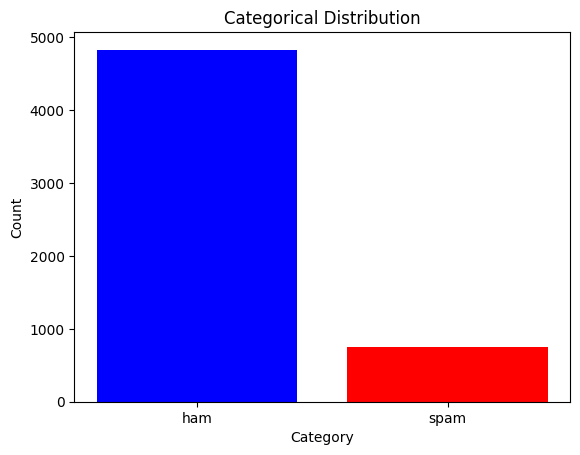

In [4]:
index = df['Class'].value_counts().index
values = df['Class'].value_counts().values
plt.bar(index,values,color=['blue','red'])
plt.title("Categorical Distribution")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

In [5]:
df = df.copy()
df

,Class,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5569,spam,This is the 2nd time we have tried 2 contact u...
5570,ham,Will ü b going to esplanade fr home?
5571,ham,"Pity, * was in mood for that. So...any other s..."
5572,ham,The guy did some bitching but I acted like i'd...


Encoding Spam and ham

In [6]:
df['Class'] = df['Class'].map({'ham':0,'spam':1})

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Class    5574 non-null   int64 
 1   Message  5574 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


Message_length Feature :- As More number of times Spam Mails are lengthy

In [8]:
df["Message_length"] = df["Message"].apply(len)
df

,Class,Message,Message_length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5569,1,This is the 2nd time we have tried 2 contact u...,160
5570,0,Will ü b going to esplanade fr home?,36
5571,0,"Pity, * was in mood for that. So...any other s...",57
5572,0,The guy did some bitching but I acted like i'd...,125


Keyword Count feature :- Some of the keywords present in Spam messages

In [9]:
spam_keywords = ['Urgent',
'Winner',
'Claim',
'Free',
'Risk-free',
'Prize',
'Congratulations',
'Credit',
'Debt',
'Exclusive',
'Guaranteed',
'Instant',
'Click here',
'Limited-time offer',
'Earn money',
'Loan',
'Winner',
'Deposit',
'Investment',
'Unsecured',
'Apply now',
'Win big',
'Offers',
'Unclaimed',
'Cash',
'Verify',
'Account',
'Promotion',
'Win',
'won',
'Reward',
'Cheap',
'Make money',
'Best offer',
'Help you',
'Opportunity',
'Bargain',
'Call now'
'Confirm',
'Unsubscribe',
'Risk-free trial']
def count_keywords(text,keywords):
  return sum([1 for word in text.split() if word in keywords])
df['count'] = df['Message'].apply(lambda x: count_keywords(x,spam_keywords))
df

,Class,Message,Message_length,count
0,0,"Go until jurong point, crazy.. Available only ...",111,0
1,0,Ok lar... Joking wif u oni...,29,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,1
3,0,U dun say so early hor... U c already then say...,49,0
4,0,"Nah I don't think he goes to usf, he lives aro...",61,0
...,...,...,...,...
5569,1,This is the 2nd time we have tried 2 contact u...,160,1
5570,0,Will ü b going to esplanade fr home?,36,0
5571,0,"Pity, * was in mood for that. So...any other s...",57,0
5572,0,The guy did some bitching but I acted like i'd...,125,0


Data Cleaning Using regular expressions

In [10]:

def clean_text(text):

  #substituting emailaddress
  text = re.sub(r'\S+@\S+','emailaddress',text)

  #substituting urls
  text = re.sub(r'https?://\S+|www\.\S+','url',text)

  #substituting numbers
  text = re.sub(r'\d+','number',text)

  #removing all punctuation marks
  text = text.translate(str.maketrans('','',string.punctuation))

  #text to lower case
  text = text.lower()

  return text

In [11]:
df['Message'] = df['Message'].apply(clean_text)
df

,Class,Message,Message_length,count
0,0,go until jurong point crazy available only in ...,111,0
1,0,ok lar joking wif u oni,29,0
2,1,free entry in number a wkly comp to win fa cup...,155,1
3,0,u dun say so early hor u c already then say,49,0
4,0,nah i dont think he goes to usf he lives aroun...,61,0
...,...,...,...,...
5569,1,this is the numbernd time we have tried number...,160,1
5570,0,will ü b going to esplanade fr home,36,0
5571,0,pity was in mood for that soany other suggest...,57,0
5572,0,the guy did some bitching but i acted like id ...,125,0


Stop word removal And Lemmatization



In [12]:
def tokenize_stopWord(text):

  #setting stopword to
  stop_words = set(stopwords.words('english'))
  words = word_tokenize(text)
  filtered_words = [word for word in words if word not in stop_words]

  lemmatizer = WordNetLemmatizer()
  lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_words]


  return ' '.join(lemmatized_tokens)

In [13]:
nltk.download('punkt_tab')
df['Message'] = df['Message'].apply(tokenize_stopWord)
df

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,Class,Message,Message_length,count
0,0,go jurong point crazy available bugis n great ...,111,0
1,0,ok lar joking wif u oni,29,0
2,1,free entry number wkly comp win fa cup final t...,155,1
3,0,u dun say early hor u c already say,49,0
4,0,nah dont think go usf life around though,61,0
...,...,...,...,...
5569,1,numbernd time tried number contact u u £number...,160,1
5570,0,ü b going esplanade fr home,36,0
5571,0,pity mood soany suggestion,57,0
5572,0,guy bitching acted like id interested buying s...,125,0



Under Sampaling Dataset

In [14]:
from imblearn.under_sampling import RandomUnderSampler

X = df.drop(['Class'],axis=1)
y = df['Class']

resample = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = resample.fit_resample(X, y)

Feature Extraction

In [15]:
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(X_resampled['Message'])
y = y_resampled

In [16]:
X = X.toarray()
X = np.hstack((X,np.array(X_resampled['Message_length']).reshape(-1,1)))
X = np.hstack((X,np.array(X_resampled['count']).reshape(-1,1)))


In [17]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
models = {
    'Naive Bayes': MultinomialNB(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'XGBoost': XGBClassifier(),
}

In [19]:
#finding best suitable model
for model in models:
  rf_model = models[model]
  rf_model.fit(X_train, y_train)

  rf_y_train = rf_model.predict(X_train)
  rf_y_pred = rf_model.predict(X_test)

  print(f"{model} Train Accuracy:", accuracy_score(y_train, rf_y_train))
  print(f"{model} Test Accuracy:", accuracy_score(y_test, rf_y_pred))
  print(classification_report(y_test, rf_y_pred))
  print("-------------------------------------")

Naive Bayes Train Accuracy: 0.9497907949790795
Naive Bayes Test Accuracy: 0.9531772575250836
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       145
           1       0.94      0.97      0.96       154

    accuracy                           0.95       299
   macro avg       0.95      0.95      0.95       299
weighted avg       0.95      0.95      0.95       299

-------------------------------------
Random Forest Train Accuracy: 1.0
Random Forest Test Accuracy: 0.959866220735786
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       145
           1       0.99      0.94      0.96       154

    accuracy                           0.96       299
   macro avg       0.96      0.96      0.96       299
weighted avg       0.96      0.96      0.96       299

-------------------------------------
Logistic Regression Train Accuracy: 0.9598326359832636
Logistic Regression Test Accuracy: 0.9431

Choosing Random Forest Classifier

In [20]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
pred_rnf = rf.predict(X_test)
print(accuracy_score(y_test,pred_rnf))
print(classification_report(y_test,pred_rnf))

0.9565217391304348
              precision    recall  f1-score   support

           0       0.92      0.99      0.96       145
           1       0.99      0.92      0.96       154

    accuracy                           0.96       299
   macro avg       0.96      0.96      0.96       299
weighted avg       0.96      0.96      0.96       299



Confusion Matrix

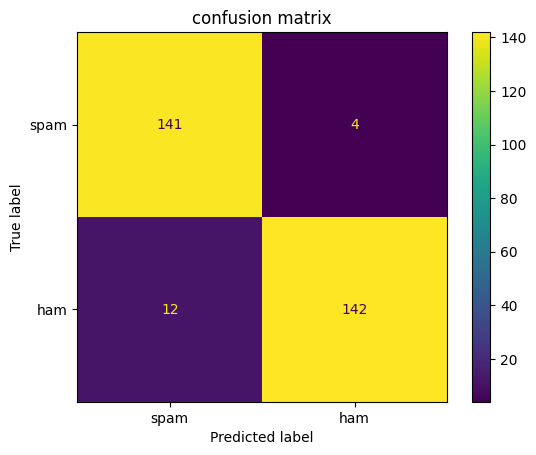

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
clf_rnf = confusion_matrix(y_test,pred_rnf)
cx_ = ConfusionMatrixDisplay(clf_rnf,display_labels=['spam','ham']).plot()
plt.title("confusion matrix")
plt.show()

In [22]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, pred_rnf)
roc_auc = auc(fpr, tpr)

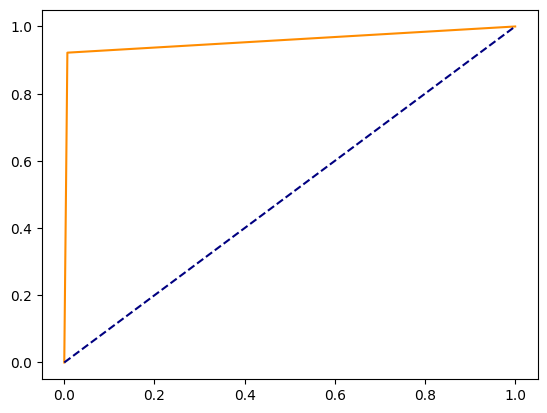

In [25]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

In [26]:
roc_auc

0.957590685176892

In [38]:
from pickle import dump
dump(rf,open('model.pkl','wb'))

In [39]:
dump(vectorizer,open('vectorizer.pkl','wb'))